In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
)

In [29]:
data = pd.read_csv("./edt-ts/data/running.csv")

data.head(20)

,uuid,timestamp,event,temperature
0,1001,2021-11-19 11:16:08,Load Cargo,NaN
1,1001,2021-11-19 13:16:08,Measure temperature,19.0
2,1001,2021-11-19 15:16:08,Measure temperature,29.0
3,1001,2021-11-19 17:16:08,Measure temperature,24.0
4,1001,2021-11-19 19:16:08,Measure temperature,28.0
5,1001,2021-11-19 21:16:08,Measure temperature,12.0
6,1001,2021-11-19 23:16:08,Measure temperature,22.0
7,1001,2021-11-20 01:16:08,Measure temperature,12.0
8,1001,2021-11-20 03:16:08,Measure temperature,29.0
9,1001,2021-11-20 05:16:08,Measure temperature,17.0


In [30]:
X = []
y = []
for id in data["uuid"].unique():
    current_data = data[data["uuid"] == id]
    X_current = np.array(
        current_data[current_data["event"] == "Measure temperature"]["temperature"]
    )
    y_current = (
        1 if len(current_data[current_data["event"] == "Discard Goods"]) == 1 else 0
    )
    X.append(X_current)
    y.append(y_current)

X = np.array(X)
y = np.array(y)

Accuracy:  0.594
Precision:  [[453  61]
 [345 141]]


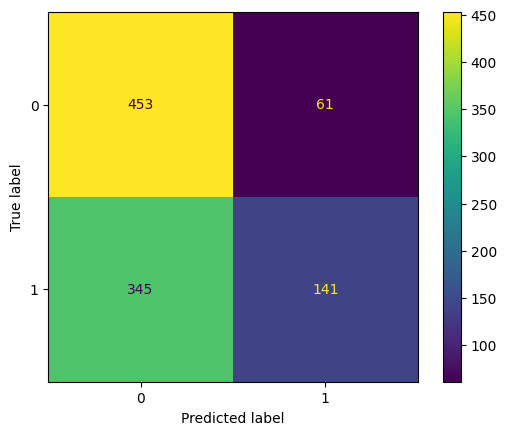

In [31]:
tree = DecisionTreeClassifier(max_depth=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Precision: ", cm)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [32]:
# data = pd.read_csv("./edt-ts/data/group5_checkin.csv")
data = pd.read_csv("./edt-ts/data/group5_checkin_random.csv")



data.head(20)

,case_id,activity,event_order,exchange_rate
0,1,Check-in,1,NaN
1,1,Check exchange rate,2,1.13
2,1,Check exchange rate,3,0.80
3,1,Check exchange rate,4,1.08
4,1,Check exchange rate,5,1.04
5,1,Check exchange rate,6,0.96
6,1,Check exchange rate,7,0.92
7,1,Check exchange rate,8,1.01
8,1,Check exchange rate,9,0.98
9,1,Check exchange rate,10,0.87


In [33]:
X = []
y = []
for id in data["case_id"].unique():
    current_data = data[data["case_id"] == id]
    X_current = np.array(
        current_data[current_data["activity"] == "Check exchange rate"]["exchange_rate"]
    )
    y_current = (
        1 if len(current_data[current_data["activity"] == "Pays by card"]) == 1 else 0
    )
    X.append(X_current)
    y.append(y_current)

X = np.array(X)
y = np.array(y)

Accuracy:  0.6
Precision:  0.6729758149316509
Precision:  [[560 311]
 [489 640]]


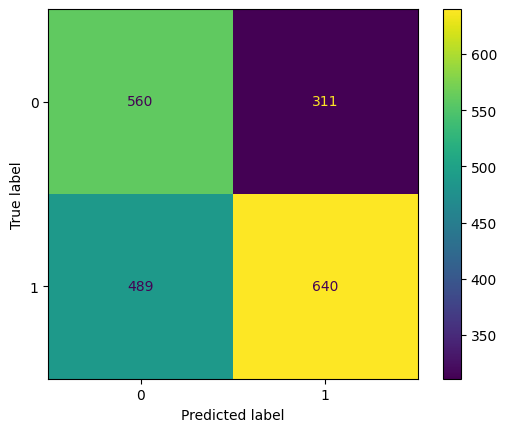

In [36]:
tree = DecisionTreeClassifier(max_depth=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
tree.fit(X_train, y_train)

predictions = tree.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
print("Precision: ", cm)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

[Text(248.0, 277.2, 'X[4] <= 0.995\ngini = 0.496\nsamples = 7999\nvalue = [3622, 4377]'),
 Text(124.0, 92.39999999999998, 'gini = 0.453\nsamples = 3851\nvalue = [1335, 2516]'),
 Text(372.0, 92.39999999999998, 'gini = 0.495\nsamples = 4148\nvalue = [2287, 1861]')]

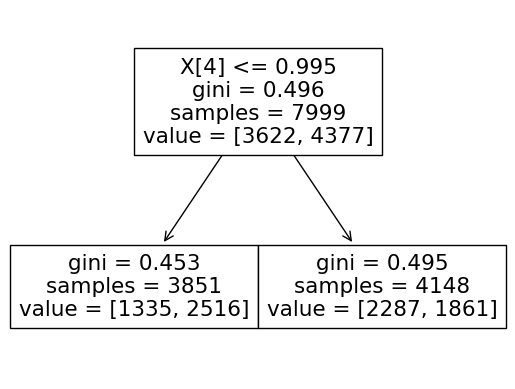

In [35]:
plot_tree(tree)